In [1]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"janvichoudhary","key":""}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download --force -d yasserh/breast-cancer-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset
License(s): CC0-1.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 17.3MB/s]


In [3]:
!unzip 'breast-cancer-dataset.zip' -d breast-cancer

Archive:  breast-cancer-dataset.zip
  inflating: breast-cancer/breast-cancer.csv  


# Importing libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import scipy.stats as stats
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, r2_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Exploratory Data Analysis

In [5]:
df = pd.read_csv("/content/breast-cancer/breast-cancer.csv")
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0    842302         M      17.9900       10.3800        122.8000  1001.0000           0.1184            0.2776          0.3001               0.1471         0.2419                  0.0787     1.0950      0.9053        8.5890 153.4000         0.0064          0.0490        0.0537             0.0159       0.0300                0.0062       25.3800        17.3300         184.6000   2019.0000            0.1622             0.6656           0.7119                0.2654          0.4601   
1    842517         M      20.5700       17.7700        132.9000  1326.0000           0.0847            0.0786          0.0869               0.0702         0.1812                  0.0567     0.5435      0.7339        3.3980  74.0800         0.0052          0.0131        0.0186             0.0134       0.0139                0.0035       24.9900        23.4100         158.8000   1956.0000            0.1238             0.1866           0.2416                0.1860          0.2750   
2  84300903         M      19.6900       21.2500        130.0000  1203.0000           0.1096            0.1599          0.1974               0.1279         0.2069                  0.0600     0.7456      0.7869        4.5850  94.0300         0.0062          0.0401        0.0383             0.0206       0.0225                0.0046       23.5700        25.5300         152.5000   1709.0000            0.1444             0.4245           0.4504                0.2430          0.3613   
3  84348301         M      11.4200       20.3800         77.5800   386.1000           0.1425            0.2839          0.2414               0.1052         0.2597                  0.0974     0.4956      1.1560        3.4450  27.2300         0.0091          0.0746        0.0566             0.0187       0.0596                0.0092       14.9100        26.5000          98.8700    567.7000            0.2098             0.8663           0.6869                0.2575          0.6638   
4  84358402         M      20.2900       14.3400        135.1000  1297.0000           0.1003            0.1328          0.1980               0.1043         0.1809                  0.0588     0.7572      0.7813        5.4380  94.4400         0.0115          0.0246        0.0569             0.0188       0.0176                0.0051       22.5400        16.6700         152.2000   1575.0000            0.1374             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                   0.1189  
1                   0.0890  
2                   0.0876  
3                   0.1730  
4                   0.0768

In [6]:
df.shape

(569, 32)

In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
df_ordered = df[['diagnosis', 'radius_mean', 'radius_se', 'radius_worst',
         'texture_mean', 'texture_se', 'texture_worst',
         'perimeter_mean', 'perimeter_se', 'perimeter_worst',
         'area_mean', 'area_se', 'area_worst',
         'smoothness_mean', 'smoothness_se', 'smoothness_worst',
         'compactness_mean', 'compactness_se', 'compactness_worst',
         'concavity_mean', 'concavity_se', 'concavity_worst',
         'concave points_mean', 'concave points_se', 'concave points_worst',
         'symmetry_mean', 'symmetry_se', 'symmetry_worst',
         'fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']]
df_ordered.head()

diagnosis  radius_mean  radius_se  radius_worst  texture_mean  texture_se  texture_worst  perimeter_mean  perimeter_se  perimeter_worst  area_mean  area_se  area_worst  smoothness_mean  smoothness_se  smoothness_worst  compactness_mean  compactness_se  compactness_worst  concavity_mean  concavity_se  concavity_worst  concave points_mean  concave points_se  concave points_worst  symmetry_mean  symmetry_se  symmetry_worst  fractal_dimension_mean  fractal_dimension_se  fractal_dimension_worst
0         M      17.9900     1.0950       25.3800       10.3800      0.9053        17.3300        122.8000        8.5890         184.6000  1001.0000 153.4000   2019.0000           0.1184         0.0064            0.1622            0.2776          0.0490             0.6656          0.3001        0.0537           0.7119               0.1471             0.0159                0.2654         0.2419       0.0300          0.4601                  0.0787                0.0062                   0.1189
1         M      20.5700     0.5435       24.9900       17.7700      0.7339        23.4100        132.9000        3.3980         158.8000  1326.0000  74.0800   1956.0000           0.0847         0.0052            0.1238            0.0786          0.0131             0.1866          0.0869        0.0186           0.2416               0.0702             0.0134                0.1860         0.1812       0.0139          0.2750                  0.0567                0.0035                   0.0890
2         M      19.6900     0.7456       23.5700       21.2500      0.7869        25.5300        130.0000        4.5850         152.5000  1203.0000  94.0300   1709.0000           0.1096         0.0062            0.1444            0.1599          0.0401             0.4245          0.1974        0.0383           0.4504               0.1279             0.0206                0.2430         0.2069       0.0225          0.3613                  0.0600                0.0046                   0.0876
3         M      11.4200     0.4956       14.9100       20.3800      1.1560        26.5000         77.5800        3.4450          98.8700   386.1000  27.2300    567.7000           0.1425         0.0091            0.2098            0.2839          0.0746             0.8663          0.2414        0.0566           0.6869               0.1052             0.0187                0.2575         0.2597       0.0596          0.6638                  0.0974                0.0092                   0.1730
4         M      20.2900     0.7572       22.5400       14.3400      0.7813        16.6700        135.1000        5.4380         152.2000  1297.0000  94.4400   1575.0000           0.1003         0.0115            0.1374            0.1328          0.0246             0.2050          0.1980        0.0569           0.4000               0.1043             0.0188                0.1625         0.1809       0.0176          0.2364                  0.0588                0.0051                   0.0768

In [9]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst             float64
fractal_dimension_worst    float64
dtype: object

In [10]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
# check repeated rows

df.duplicated().sum()

0

In [12]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

## Seperating dataframe into X and Y

In [13]:
X=df.drop(columns='diagnosis')
y=df['diagnosis']

X.head()

id  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
0    842302      17.9900       10.3800        122.8000  1001.0000           0.1184            0.2776          0.3001               0.1471         0.2419                  0.0787     1.0950      0.9053        8.5890 153.4000         0.0064          0.0490        0.0537             0.0159       0.0300                0.0062       25.3800        17.3300         184.6000   2019.0000            0.1622             0.6656           0.7119                0.2654          0.4601                   0.1189
1    842517      20.5700       17.7700        132.9000  1326.0000           0.0847            0.0786          0.0869               0.0702         0.1812                  0.0567     0.5435      0.7339        3.3980  74.0800         0.0052          0.0131        0.0186             0.0134       0.0139                0.0035       24.9900        23.4100         158.8000   1956.0000            0.1238             0.1866           0.2416                0.1860          0.2750                   0.0890
2  84300903      19.6900       21.2500        130.0000  1203.0000           0.1096            0.1599          0.1974               0.1279         0.2069                  0.0600     0.7456      0.7869        4.5850  94.0300         0.0062          0.0401        0.0383             0.0206       0.0225                0.0046       23.5700        25.5300         152.5000   1709.0000            0.1444             0.4245           0.4504                0.2430          0.3613                   0.0876
3  84348301      11.4200       20.3800         77.5800   386.1000           0.1425            0.2839          0.2414               0.1052         0.2597                  0.0974     0.4956      1.1560        3.4450  27.2300         0.0091          0.0746        0.0566             0.0187       0.0596                0.0092       14.9100        26.5000          98.8700    567.7000            0.2098             0.8663           0.6869                0.2575          0.6638                   0.1730
4  84358402      20.2900       14.3400        135.1000  1297.0000           0.1003            0.1328          0.1980               0.1043         0.1809                  0.0588     0.7572      0.7813        5.4380  94.4400         0.0115          0.0246        0.0569             0.0188       0.0176                0.0051       22.5400        16.6700         152.2000   1575.0000            0.1374             0.2050           0.4000                0.1625          0.2364                   0.0768

In [14]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [15]:
X=pd.get_dummies(X,dtype=float,drop_first=True)
X

id  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0       842302      17.9900       10.3800        122.8000  1001.0000           0.1184            0.2776          0.3001               0.1471         0.2419                  0.0787     1.0950      0.9053        8.5890 153.4000         0.0064          0.0490        0.0537             0.0159       0.0300                0.0062       25.3800        17.3300         184.6000   2019.0000            0.1622             0.6656           0.7119                0.2654          0.4601   
1       842517      20.5700       17.7700        132.9000  1326.0000           0.0847            0.0786          0.0869               0.0702         0.1812                  0.0567     0.5435      0.7339        3.3980  74.0800         0.0052          0.0131        0.0186             0.0134       0.0139                0.0035       24.9900        23.4100         158.8000   1956.0000            0.1238             0.1866           0.2416                0.1860          0.2750   
2     84300903      19.6900       21.2500        130.0000  1203.0000           0.1096            0.1599          0.1974               0.1279         0.2069                  0.0600     0.7456      0.7869        4.5850  94.0300         0.0062          0.0401        0.0383             0.0206       0.0225                0.0046       23.5700        25.5300         152.5000   1709.0000            0.1444             0.4245           0.4504                0.2430          0.3613   
3     84348301      11.4200       20.3800         77.5800   386.1000           0.1425            0.2839          0.2414               0.1052         0.2597                  0.0974     0.4956      1.1560        3.4450  27.2300         0.0091          0.0746        0.0566             0.0187       0.0596                0.0092       14.9100        26.5000          98.8700    567.7000            0.2098             0.8663           0.6869                0.2575          0.6638   
4     84358402      20.2900       14.3400        135.1000  1297.0000           0.1003            0.1328          0.1980               0.1043         0.1809                  0.0588     0.7572      0.7813        5.4380  94.4400         0.0115          0.0246        0.0569             0.0188       0.0176                0.0051       22.5400        16.6700         152.2000   1575.0000            0.1374             0.2050           0.4000                0.1625          0.2364   
5       843786      12.4500       15.7000         82.5700   477.1000           0.1278            0.1700          0.1578               0.0809         0.2087                  0.0761     0.3345      0.8902        2.2170  27.1900         0.0075          0.0335        0.0367             0.0114       0.0216                0.0051       15.4700        23.7500         103.4000    741.6000            0.1791             0.5249           0.5355                0.1741          0.3985   
6       844359      18.2500       19.9800        119.6000  1040.0000           0.0946            0.1090          0.1127               0.0740         0.1794                  0.0574     0.4467      0.7732        3.1800  53.9100         0.0043          0.0138        0.0225             0.0104       0.0137                0.0022       22.8800        27.6600         153.2000   1606.0000            0.1442             0.2576           0.3784                0.1932          0.3063   
7     84458202      13.7100       20.8300         90.2000   577.9000           0.1189            0.1645          0.0937               0.0599         0.2196                  0.0745     0.58

In [16]:
X.shape

(569, 31)

## Changing dtype: object to boolean

In [17]:
# 1 for Malignant, 0 for Benign
df["diagnosis"] = df["diagnosis"].map({"B": 0, "M":1})

In [18]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

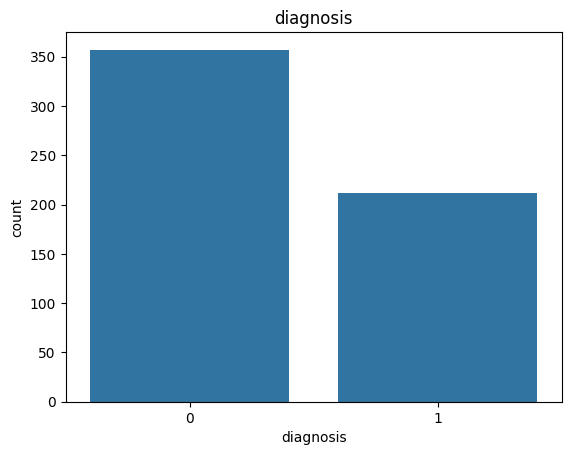

In [19]:
sns.countplot(x=df['diagnosis'])
plt.title('diagnosis');

## Split data into train and test data

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

# LIME Model
## Note: generated with AI need to recheck the difference in values

In [21]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=ff2a0a5e67d5ff6572e63c47e7debde9a57545993b314c88eef1f4b695f47611
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [23]:
# prompt: Apply LIME model to X_train , X_test , y_train , y_test and predict whether the diagnosis of 0 or 1
# part 1 generated with AI LIME Model


import numpy as np
import lime
import lime.lime_tabular

# Create and train the decision tree model
DT_model = DecisionTreeClassifier()  # Initialize the model
DT_model.fit(X_train, y_train)  # Train the model using your training data

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    class_names=['0', '1'],
    mode='classification'
)

# Predict for a new instance
instance = X_test.iloc[0]

explanation = explainer.explain_instance(
    data_row=instance,
    predict_fn=DT_model.predict_proba
)

explanation.show_in_notebook(show_table=True)

# Predict the diagnosis of the new instance
predicted_class = DT_model.predict([instance])[0]

print(f"Predicted diagnosis: {predicted_class}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Predicted diagnosis: B


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [24]:
# prompt: Apply LIME model to X_train , X_test , y_train , y_test and predict whether the diagnosis of 0 or 1
# Part-2 generated with AI LIME Model


import numpy as np
import lime
import lime.lime_tabular

# Create and train the decision tree model
DT_model = DecisionTreeClassifier()  # Initialize the model
DT_model.fit(X_train, y_train)  # Train the model using your training data

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['0', '1'],
    mode='classification'
)

i = 20

exp = explainer.explain_instance(
    np.array(X_test.iloc[i]),
    predict_fn=DT_model.predict_proba
)

exp.show_in_notebook(show_table=True)

print('True diagnosis:', y_test.iloc[i])
print('Predicted diagnosis:', DT_model.predict(X_test.iloc[i].values.reshape(1, -1)))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


True diagnosis: M
Predicted diagnosis: ['B']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
